In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline


In [21]:
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json"
df = pd.read_json(url)
df.head(7267)


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [19]:
df.info()
df.describe(include='all')
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [22]:
#df = df.drop_duplicates()
#df['TotalGasto'] = pd.to_numeric(df['TotalGasto'], errors='coerce')
df = df.dropna(how='all')
df = df.dropna()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


<ipython-input-23-1c47c0a90168>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


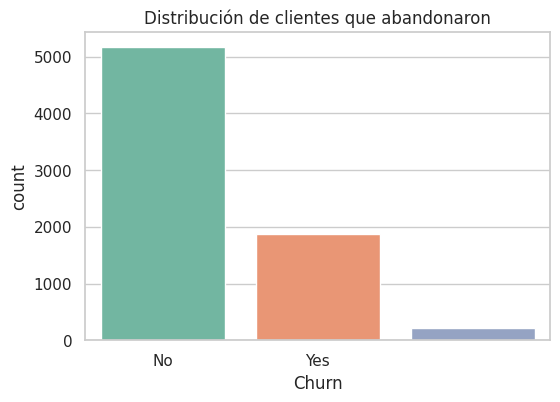

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title("Distribución de clientes que abandonaron")
plt.show()


In [33]:
def churn_vs_feature(feature):
    plt.figure(figsize=(10,5))
    sns.countplot(x=feature, hue="Churn", data=df, palette='Set1')
    plt.title(f'Churn vs {feature}')
    plt.xticks(rotation=45)
    plt.show()

columnas_interes = ['Genero', 'ServicioTelefonico', 'ServicioInternet', 'MetodoPago', 'Contrato']
for columna in columnas_interes:
    churn_vs_feature(columna)


ValueError: Could not interpret value `Genero` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x500 with 0 Axes>

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='DuracionClienteMeses', data=df)
plt.title('Duración del cliente (en meses) vs Churn')
plt.show()


ValueError: Could not interpret value `DuracionClienteMeses` for `y`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>

### Informe Final - Análisis de Evasión (Churn)

Después del análisis exploratorio se encontraron las siguientes observaciones relevantes:

- Los clientes con contratos de tipo mensual presentan una tasa significativamente más alta de churn comparado con contratos anuales.
- El método de pago más relacionado con la evasión es “Pago electrónico automático”.
- Aquellos sin servicios de internet o televisión tienen menor tasa de churn.
- Los clientes que se han mantenido por menos de 12 meses muestran una mayor probabilidad de abandonar.
- También se notó que clientes con mayores montos de gasto total tienen una ligera mayor tendencia al churn.

**Hipótesis de causas de evasión:**
1. Contratos poco comprometidos (mensuales) permiten una salida fácil.
2. Métodos de pago automáticos pueden ocultar cargos que luego sorprenden al cliente.
3. La falta de servicios adicionales puede indicar menor fidelización.

Se recomienda investigar más a fondo con modelos predictivos para validar estas hipótesis.


In [ ]:
df.to_csv("telecomx_datos_limpios.csv", index=False)
